# 📊 Supervised Machine Learning – Regression Final Assignment

**Author**: Laura Puerto  
**Course**: IBM – Supervised Machine Learning: Regression  
**Topic**: Analyzing factors associated with children’s daily screen time  
**Dataset**: ["Average Daily Screen Time for Children"](https://www.kaggle.com/datasets/ak0212/average-daily-screen-time-for-children)

---

## ⚙️ Assignment Requirements

The following are the required components for this final regression assignment. This notebook follows these guidelines to ensure a clear and well-structured analysis:

- ✅ **Main objective** of the analysis (prediction or interpretation)
- ✅ **Brief description** of the dataset and its attributes
- ✅ **Summary of data exploration and cleaning**
- ✅ **Training and comparison of three linear regression models**:
  - Simple linear regression (baseline)
  - Polynomial regression
  - Regularized regression (e.g., Ridge or Lasso)
- ✅ **Final model recommendation**
- ✅ **Key findings and insights**
- ✅ **Suggestions for future improvements**

---

In [1]:
# Uncomment and run only if these libraries are not already installed
# !pip install -U scikit-learn
# !pip install pandas
# !pip install numpy
# !pip install seaborn
# !pip install matplotlib

# Import core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set default style
sns.set(style="whitegrid")

## Load the Dataset

First, we load the dataset into a pandas dataframe and explore its structure.  
This quick exploration will help us understand the number of rows and columns, the attribute names, and the different values contained in categorical variables such as `Gender`, `Screen Time Type` and `Day Type`.

In [2]:
# Load the dataset
data = pd.read_csv("data/screen_time.csv")

# Dataset structure
print("Shape:", data.shape)
print("\nColumns:\n", data.columns)

print("")

# Unique values in categorical variables
print("Unique values in 'Gender':", data['Gender'].unique())
print("Unique values in 'Screen Time Type':", data['Screen Time Type'].unique())
print("Unique values in 'Day Type':", data['Day Type'].unique())

print("")

# Preview the first few rows of the dataset
data.head()

Shape: (198, 6)

Columns:
 Index(['Age', 'Gender', 'Screen Time Type', 'Day Type',
       'Average Screen Time (hours)', 'Sample Size'],
      dtype='object')

Unique values in 'Gender': ['Male' 'Female' 'Other/Prefer not to say']
Unique values in 'Screen Time Type': ['Educational' 'Recreational' 'Total']
Unique values in 'Day Type': ['Weekday' 'Weekend']



,Age,Gender,Screen Time Type,Day Type,Average Screen Time (hours),Sample Size
0,5,Male,Educational,Weekday,0.44,500
1,5,Male,Recreational,Weekday,1.11,500
2,5,Male,Total,Weekday,1.55,500
3,5,Male,Educational,Weekend,0.50,500
4,5,Male,Recreational,Weekend,1.44,500


---

# 1. About the Data

This dataset, titled **"Average Daily Screen Time for Children"**, provides information on children's screen time categorized by screen type and day type, along with demographic context such as age and gender.

It includes the following attributes:
- `Age`: Age of the children in years.
- `Gender`: Gender of the children (e.g., Male/Female/Other/Prefer not to say).
- `Screen Time Type`: Type of screen time, such as educational, recreational, or total.
- `Day Type`: Indicates whether the screen time was recorded on a weekday or a weekend day.
- `Average Screen Time (hours)`: Average number of hours spent on screens per day.
- `Sample Size`: Number of children represented by the observation (aggregated data).

The dataset contains **198 observations** and **6 attributes**.  
It is suitable for regression analysis focused on understanding how different factors (like age, day type, or screen time type) influence the average daily screen time.

These attributes will serve as the foundation for our regression models, helping us explore which factors are most associated with variations in children's average screen time.

---

# 2. Objectives

The main objective of this analysis is to understand which factors best explain children's average daily screen time, and use that understanding to make informed predictions.

Specifically, I aim to:
- Identify the key variables that influence the amount of time children spend on screens each day.
- Use this knowledge to estimate how much screen time children are likely to have at ages 11 to 15.

Although the dataset includes children from ages 5 to 15, my personal interest is focused on the 11–15 age group, as I have 10-year-old children. Understanding these trends will help anticipate how their screen habits might evolve in the coming years.

The target variable in this regression task is:
- `Average Screen Time (hours)`

The explanatory variables considered in this analysis include:
- `Age`, `Gender`, `Screen Time Type` and `Day Type`


---

# 3. Linear Regression Models

### 1️⃣ Data Preparation

Before training our models, we prepare the dataset by defining the target variable, selecting the features, and converting categorical variables into numerical format.

- The target variable (`y`) is **Average Screen Time (hours)**.
- The explanatory variables (`X`) include all other columns **except `Sample Size`**, which is excluded as it does not represent a true characteristic of the children.
- Categorical variables such as `Gender`, `Screen Time Type`, and `Day Type` are encoded using one-hot encoding via `pd.get_dummies()`.
- Since the only numeric feature is `Age` (ranging from 5 to 15), and no feature has values with large magnitude differences, we do **not apply feature scaling**.
- Finally, we split the data into training and testing sets (70/30 split).


In [3]:
from sklearn.model_selection import train_test_split

# Encode categorical variables
data = pd.get_dummies(data, drop_first=True)

# Define features and target
X = data.drop(['Average Screen Time (hours)', 'Sample Size'], axis=1)
y = data['Average Screen Time (hours)']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Check dimensions
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (138, 6)
Test set shape: (60, 6)


### 2️⃣ Model 1: Simple Linear Regression (baseline)

We begin with a simple linear regression model as our baseline.

- This model is trained using the training dataset and evaluated on the test set.
- The performance is measured using the R² score and Mean Squared Error (MSE).
- We also visualize the actual vs predicted values to assess the quality of the model.

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Train model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict on test set
predicted = lr.predict(X_test)

# Evaluate
r2_train = lr.score(X_train, y_train)
r2_test = lr.score(X_test, y_test)
mse = mean_squared_error(y_test, predicted)

# Print results
print("R^2 on training data :", r2_train)
print("R^2 on testing data  :", r2_test)
print("Mean squared error   :", mse)


R^2 on training data : 0.9069906797996906
R^2 on testing data  : 0.8778000123581059
Mean squared error   : 0.5358381066772664


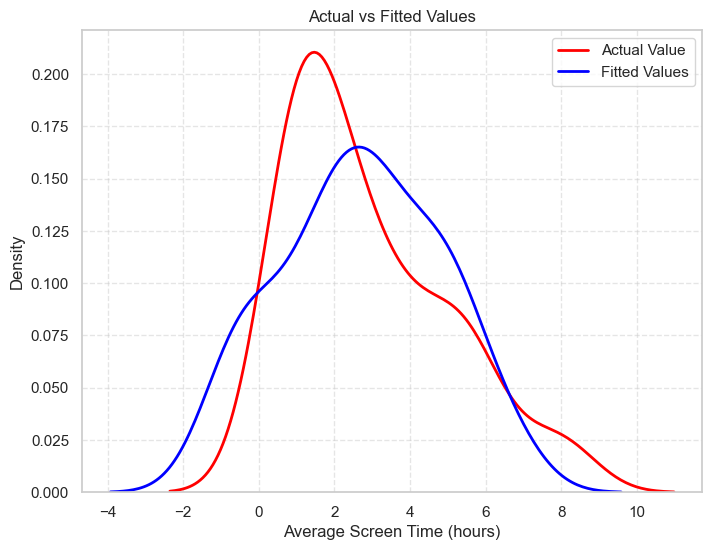

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.kdeplot(y_test, label="Actual Value", color="red", linewidth=2)
sns.kdeplot(predicted, label="Fitted Values", color="blue", linewidth=2)

plt.title("Actual vs Fitted Values")
plt.xlabel("Average Screen Time (hours)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()

### 3️⃣ Model 2: Polynomial Regression

In this section, we explore whether adding polynomial terms improves the model's performance.

- We transform the features using polynomial expansion to allow the model to capture nonlinear relationships.
- We then fit a linear regression model on the transformed features.
- We evaluate performance using R² and MSE on the test set.
- Finally, we visualize actual vs predicted values to assess fit quality.

In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Step 1: Create polynomial features (degree=2 is a good start)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Step 2: Train linear regression on polynomial features
lr_poly = LinearRegression()
lr_poly.fit(X_poly_train, y_train)
predicted_poly = lr_poly.predict(X_poly_test)

# Step 3: Evaluate model
r2_train_poly = lr_poly.score(X_poly_train, y_train)
r2_test_poly = lr_poly.score(X_poly_test, y_test)
mse_poly = mean_squared_error(y_test, predicted_poly)

print("Polynomial Regression (degree=2)")
print("R² on training data:", r2_train_poly)
print("R² on testing data :", r2_test_poly)
print("Mean squared error :", mse_poly)


Polynomial Regression (degree=2)
R² on training data: 0.9906151808451922
R² on testing data : 0.990143897434879
Mean squared error : 0.0432182968233034


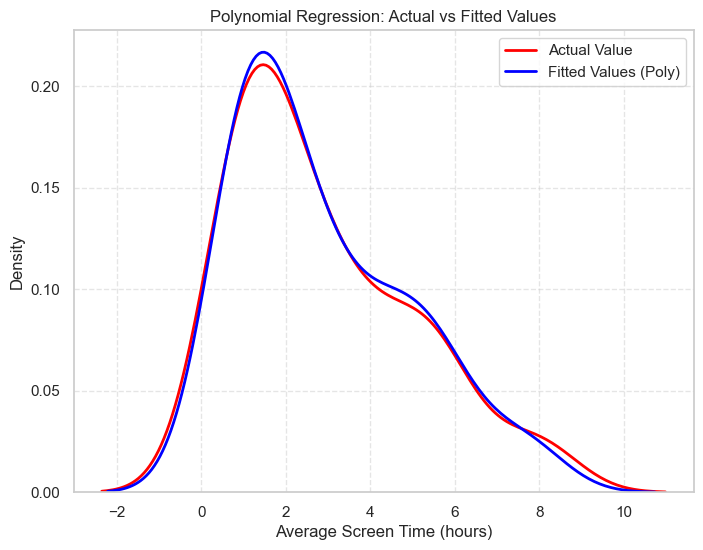

In [7]:
plt.figure(figsize=(8, 6))
sns.kdeplot(y_test, label="Actual Value", color="red", linewidth=2)
sns.kdeplot(predicted_poly, label="Fitted Values (Poly)", color="blue", linewidth=2)
plt.xlabel("Average Screen Time (hours)")
plt.title("Polynomial Regression: Actual vs Fitted Values")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### 4️⃣ Model 3: Regularization with Ridge Regression and Lasso

In this section, we apply regularized linear regression techniques to try to improve model generalization and reduce overfitting.

- **Ridge Regression** introduces a penalty term to shrink coefficients and reduce model complexity.
- **Lasso Regression** adds a similar penalty but can also eliminate irrelevant features by setting their coefficients to zero.
- We use `alpha = 0.1` for both models as a starting point.
- Model performance is evaluated using the R² score and Mean Squared Error (MSE) on the test set.
- Finally, we visualize actual vs predicted values to assess fit quality.


In [8]:
# ---- Ridge Regression ----

from sklearn.linear_model import Ridge

# Train model
rr = Ridge(alpha = 0.1)
rr.fit(X_train, y_train)

# Predict on test set
predicted_rr = rr.predict(X_test)

# Evaluate
r2_train_rr = rr.score(X_train, y_train)
r2_test_rr = rr.score(X_test, y_test)
mse_rr = mean_squared_error(y_test, predicted_rr)

# Print results
print("Ridge Regression")
print("R^2 on training data :", r2_train_rr)
print("R^2 on testing data  :", r2_test_rr)
print("Mean squared error   :", mse_rr)

Ridge Regression
R^2 on training data : 0.9069666939013312
R^2 on testing data  : 0.8784583170989725
Mean squared error   : 0.5329514880059425


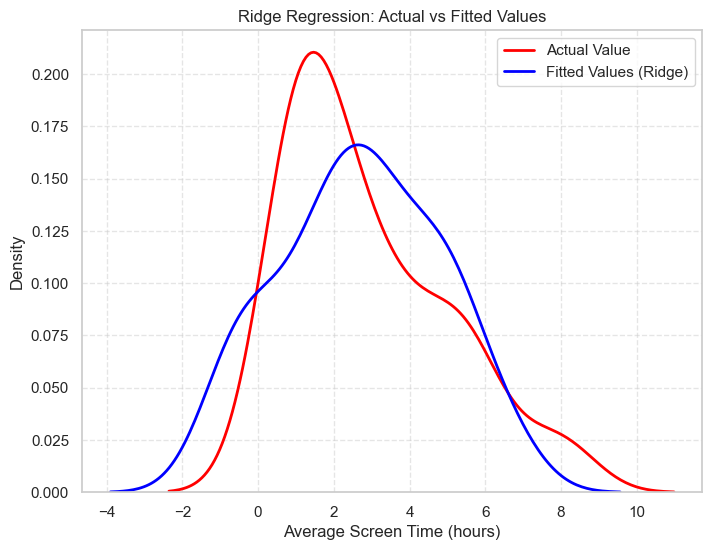

In [9]:
# Visualization: Ridge

plt.figure(figsize=(8, 6))
sns.kdeplot(y_test, label="Actual Value", color="red", linewidth=2)
sns.kdeplot(predicted_rr, label="Fitted Values (Ridge)", color="blue", linewidth=2)
plt.xlabel("Average Screen Time (hours)")
plt.title("Ridge Regression: Actual vs Fitted Values")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


In [10]:
from sklearn.linear_model import Lasso

# Train model
las = Lasso(alpha = 0.1)
las.fit(X_train, y_train)

# Predict on test set
predicted_las = las.predict(X_test)

# Evaluate
r2_train_las = las.score(X_train, y_train)
r2_test_las = las.score(X_test, y_test)
mse_las = mean_squared_error(y_test, predicted_las)

# Print results
print("R^2 on training data :", r2_train_las)
print("R^2 on testing data  :", r2_test_las)
print("Mean squared error   :", mse_las)

R^2 on training data : 0.830179083800967
R^2 on testing data  : 0.8359836316519221
Mean squared error   : 0.7191999113556776


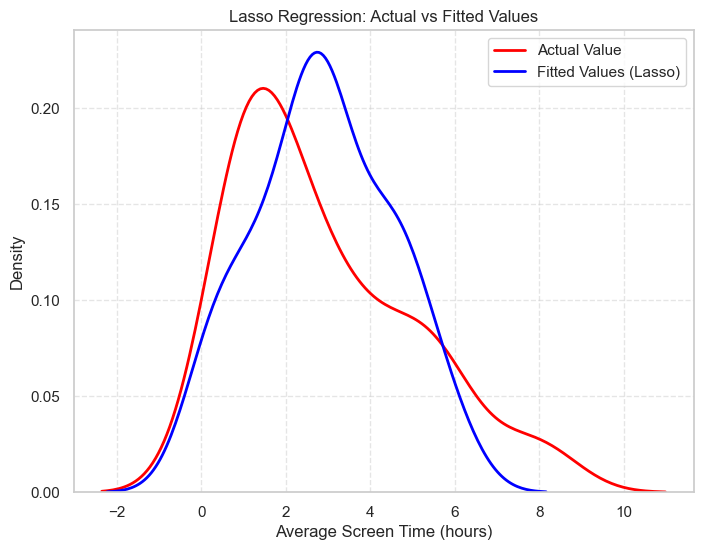

In [11]:
# Visualization: Lasso
plt.figure(figsize=(8, 6))
sns.kdeplot(y_test, label="Actual Value", color="red", linewidth=2)
sns.kdeplot(predicted_las, label="Fitted Values (Lasso)", color="blue", linewidth=2)
plt.xlabel("Average Screen Time (hours)")
plt.title("Lasso Regression: Actual vs Fitted Values")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


---

# 4. Insights and key findings

In this section, we compare the performance of the three models and highlight the key insights from our regression analysis:

- **Simple Linear Regression** served as the baseline model. It performed reasonably well with an R² score of **0.877** on the test set and a Mean Squared Error (MSE) of **0.535**. However, its predictions showed a noticeable deviation from the actual values in the density plot.

- **Polynomial Regression (degree = 2)** provided the best performance overall:
  - The R² on the test set increased to **0.99**, indicating a better fit.
  - The MSE decreased to **0.043**, suggesting more accurate predictions.
  - The KDE plot showed a strong alignment between the actual and predicted values.
  
  These results suggest a slightly nonlinear relationship between the features and the target variable, which the polynomial terms are able to capture effectively.

- **Ridge Regression** achieved good results, with an R² of **0.878** and a lower MSE than the baseline. However, the predicted values did not align as well visually with the actual values as in the polynomial model.

- **Lasso Regression** had the lowest performance:
  - The R² dropped to **0.836**.
  - The MSE increased to **0.719**, the highest among all models.
  - The KDE plot showed a better visual fit near the peak compared to Ridge, but overall predictions were still less accurate, especially in the tails of the distribution.

💡 **Conclusion**: The **Polynomial Regression model** offers the best trade-off between complexity and accuracy in this case. Since the model captures the nonlinear patterns without overfitting, regularization techniques like Ridge and Lasso, which reduce model complexity, result in underfitting and poorer predictive performance.

### 4.1 Key Insights from Feature Importance

Based on the simple linear regression model, we examined which variables are statistically associated with differences in children’s average daily screen time. The most influential coefficients are listed below:

In [12]:
# Create DataFrame of coefficients
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lr.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

# Display table
coef_df

,Feature,Coefficient
4,Screen Time Type_Total,3.295118
3,Screen Time Type_Recreational,2.155082
5,Day Type_Weekend,0.735701
0,Age,0.380466
1,Gender_Male,0.252674
2,Gender_Other/Prefer not to say,0.124137


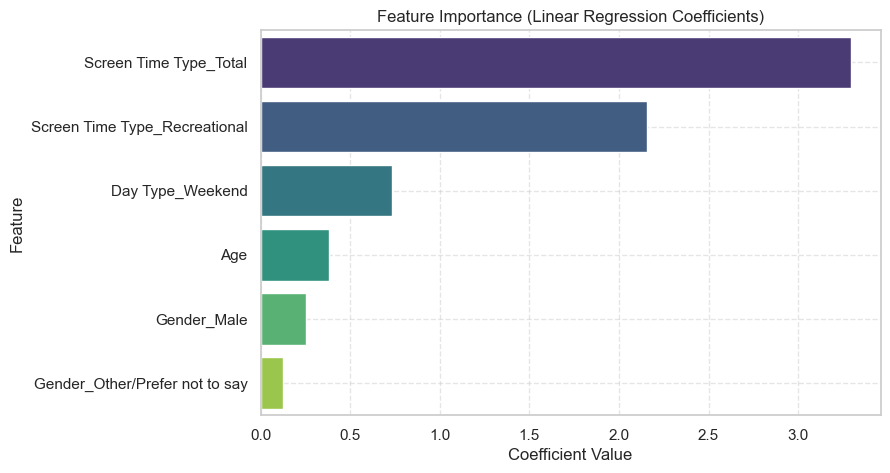

In [13]:
plt.figure(figsize=(8, 5))
sns.barplot(
    data=coef_df,
    x='Coefficient',
    y='Feature',
    hue='Feature',            
    dodge=False,             
    palette='viridis',
    legend=False              
)
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()

- **Screen Time Type_Total** (coef. = 3.30): Children whose screen time is classified as *Total* spend approximately **3.3 more hours per day** on screens compared to those in the base category (*Educational*).
- **Screen Time Type_Recreational** (coef. = 2.16): Recreational screen time is also associated with higher usage, about **2.16 hours more** than *Educational* time.
- **Day Type_Weekend** (coef. = 0.74): Screen time increases by around **0.74 hours on weekends** compared to weekdays.
- **Age** (coef. = 0.38): For each additional year of age, average daily screen time increases by approximately **0.38 hours**.
- **Gender_Male** (coef. = 0.25): Boys tend to spend slightly more time on screens than girls (*Female*, the base category).
- **Gender_Other/Prefer not to say** (coef. = 0.12): Slightly higher than *Female*, but the effect is minimal.

> ⚠️ **Important note**: While *Screen Time Type* and *Day Type* show large coefficient values, they represent **how the target variable was categorized** (not independent predictors). For example, the label “Total” includes both educational and recreational time, which naturally increases the average. These variables do not *cause* more screen time — they are descriptive, not explanatory.

✅ Therefore, among the **true explanatory variables**, the most relevant drivers of daily screen time are:
- **Age** (older children spend more time on screens),
- and to a lesser extent, **Gender** (boys slightly more than girls).

These results address the **first objective** of our analysis:  
> ✳️ *Identify the key variables that influence the amount of time children spend on screens each day.*


### 4.2 Predicting Screen Time for Ages 11 to 15

In this final part of the analysis, we use the best-performing model — **Polynomial Regression (degree = 2)** — to estimate the average daily screen time for children aged 11 to 15. This prediction addresses our second objective:

> ✅ *Use this knowledge to estimate how much screen time children are likely to have at ages 11 to 15.*

We generate a synthetic dataset for ages 11 to 15 using the **most common profile** observed in the data, keeping categorical variables fixed to typical values. This allows us to isolate the effect of age on screen time predictions.

In [14]:
# Create new DataFrame for ages 11 to 15
ages = list(range(11, 16))
new_data = pd.DataFrame({
    'Age': ages,
    'Gender_Male': [1]*5,   # Assuming Male
    'Gender_Other/Prefer not to say': [0]*5,
    'Screen Time Type_Recreational': [0]*5,
    'Screen Time Type_Total': [0]*5,  # Reference: Educational
    'Day Type_Weekend': [0]*5         # Reference: Weekday
})

# Apply polynomial transformation
new_data_poly = poly.transform(new_data)

# Predict using polynomial model
predicted_screen_time = lr_poly.predict(new_data_poly)

# Display results
predicted_df = pd.DataFrame({
    'Age': ages,
    'Predicted Screen Time (hours)': predicted_screen_time
})
predicted_df


,Age,Predicted Screen Time (hours)
0,11,1.190337
1,12,1.300009
2,13,1.407692
3,14,1.513385
4,15,1.617090


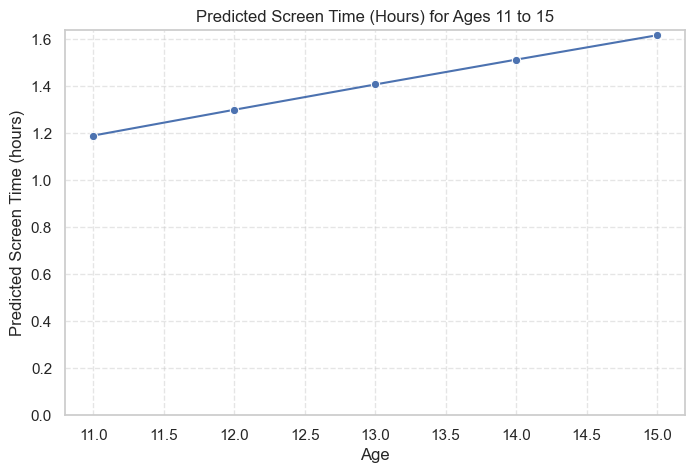

In [15]:
plt.figure(figsize=(8,5))
sns.lineplot(data=predicted_df, x='Age', y='Predicted Screen Time (hours)', marker='o')
plt.title("Predicted Screen Time (Hours) for Ages 11 to 15")
plt.grid(True, linestyle='--', alpha=0.5)
plt.ylim(bottom=0)
plt.show()


The chart and table above provide an estimate of daily screen time for children aged 11 to 15 based on our model. As expected, the model predicts a **moderate increase in screen time with age**, assuming a fixed profile (educational use, weekday, male).

This confirms that **age is a meaningful predictor** of screen time — older children are expected to spend more time on screens each day.


### 5. Next Steps

In this section, we outline possible next steps to expand and refine this analysis:

- **Collect more data**: Including additional demographic or behavioral variables (e.g., parental control, internet access, academic performance) could help uncover deeper insights into screen time usage.
- **Explore interaction effects**: Investigate whether interactions between variables (e.g., age × gender, or screen time type × day type) influence screen time in a nonlinear way.
- **Validate with new data**: Apply the model to a fresh dataset to evaluate how well it generalizes to unseen children or different contexts.
- **Incorporate temporal patterns**: If time-stamped data is available, explore how screen usage evolves throughout the day or week.
- **Segment analysis**: Analyze subgroups (e.g., by gender or age bands) separately to uncover specific patterns and tailor recommendations.

> These next steps can help build a more comprehensive model of children’s screen usage and support data-driven decision-making in educational or health-related contexts.
